Healthy Eating Dataset Analysis

DataSet Source: https://www.kaggle.com/datasets/khushikyad001/healthy-eating-dataset

In [ ]:
Name: G.Madhupriya
RollNo: 2211CS010633
Section: S1 - 86

In [ ]:
1.Dataset Overview:
    File Name: healthy_eating_dataset.csv
    Rows: 2000
    Columns: 20
    Category: Nutrition + Lifestyle
    Purpose: Analyze meal nutritional information, cooking patterns, dietary preferences, and health ratings.
        
2.DataSet Columns and Datatypes:
    i. meal_id – an integer column representing the unique ID of each meal.
    ii. meal_name – a string column containing the name of the meal.
    iii. cuisine – a string column representing the cuisine type (e.g., Indian, Italian, Chinese).
    iv. meal_type – a string column indicating the type of meal such as Breakfast, Lunch, Dinner, or Snack.
    v. diet_type – a string column showing whether the meal is Vegetarian, Vegan, or Non-Vegetarian.
    vi. calories – an integer column representing the calorie content of the meal.
    vii. protein_g – a float column representing the protein amount (in grams).
    viii. carbs_g – a float column representing the carbohydrate content (in grams).
    ix. fat_g – a float column showing the fat content (in grams).
    x. fiber_g – a float column showing dietary fiber (in grams).
    xi. sugar_g – a float column representing sugar content (in grams).
    xii. sodium_mg – an integer column representing sodium content (in milligrams).
    xiii. cholesterol_mg – an integer column showing cholesterol amount (in milligrams).
    xiv. serving_size_g – an integer column showing serving size (in grams).
    xv. cooking_method – a string column describing how the meal is cooked (e.g., Boiled, Grilled, Fried).
    xvi. prep_time_min – an integer column representing preparation time in minutes.
    xvii. cook_time_min – an integer column representing cooking time in minutes.
    xviii. rating – a float column indicating the average user rating of the meal.
    xix. is_healthy – an integer column indicating if the meal is considered healthy (1 = Yes, 0 = No).
    xx. image_url – a string column containing a URL link to the meal image.
        
3.Data Quality Notes;
    Missing Values: Some may exist in columns like rating, fiber_g, or sugar_g—these should be checked and handled appropriately.
    Duplicates: Possible duplicates may exist based on meal name or ID—require removal for accuracy.
    Outliers: Likely in calories, fat_g, and protein_g (meals with extremely high or low nutritional values).
        
4.Categorical Column Distributions (Example):
    i. cuisine – The most common cuisines are Indian, Italian, and Chinese.
    ii. meal_type – The primary meal types are Breakfast, Lunch, and Dinner.
    iii. diet_type – The main diet categories include Vegetarian, Vegan, and Non-Vegetarian.
    iv. cooking_method – Common cooking methods are Grilled, Boiled, and Fried.
    v. is_healthy – Most meals are labeled as healthy (1).

In [3]:

# --- Import Libraries ---
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, min, max, count, isnan, when
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Initialize Spark Session ---
spark = SparkSession.builder.appName("Healthy_Eating_Analysis").getOrCreate()

# --- Load Dataset ---
df = spark.read.csv("healthy_eating_dataset.csv", header=True, inferSchema=True)

# --- Display Schema & Sample ---
print("=== Dataset Schema ===")
df.printSchema()

print("\n=== First 5 Rows ===")
df.show(5)

=== Dataset Schema ===
root
 |-- meal_id: integer (nullable = true)
 |-- meal_name: string (nullable = true)
 |-- cuisine: string (nullable = true)
 |-- meal_type: string (nullable = true)
 |-- diet_type: string (nullable = true)
 |-- calories: integer (nullable = true)
 |-- protein_g: double (nullable = true)
 |-- carbs_g: double (nullable = true)
 |-- fat_g: double (nullable = true)
 |-- fiber_g: double (nullable = true)
 |-- sugar_g: double (nullable = true)
 |-- sodium_mg: integer (nullable = true)
 |-- cholesterol_mg: integer (nullable = true)
 |-- serving_size_g: integer (nullable = true)
 |-- cooking_method: string (nullable = true)
 |-- prep_time_min: integer (nullable = true)
 |-- cook_time_min: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- is_healthy: integer (nullable = true)
 |-- image_url: string (nullable = true)


=== First 5 Rows ===
+-------+-------------+-------+---------+---------+--------+---------+-------+-----+-------+-------+---------+-----

In [2]:
# --- Rows & Columns Count ---
rows = df.count()
cols = len(df.columns)
print(f"\nTotal Rows: {rows}, Total Columns: {cols}")

# --- Summary Statistics ---
print("\n=== Summary Statistics ===")
df.describe().show()


Total Rows: 2000, Total Columns: 20

=== Summary Statistics ===
+-------+-----------------+--------------+--------+---------+----------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+--------------+------------------+------------------+------------------+------------------+--------------------+
|summary|          meal_id|     meal_name| cuisine|meal_type| diet_type|          calories|        protein_g|          carbs_g|             fat_g|           fiber_g|           sugar_g|        sodium_mg|   cholesterol_mg|    serving_size_g|cooking_method|     prep_time_min|     cook_time_min|            rating|        is_healthy|           image_url|
+-------+-----------------+--------------+--------+---------+----------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------

In [4]:
# --- Missing Value Count (Safe Version) ---
print("\n=== Missing Value Count ===")
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

# --- Data Types ---
print("\n=== Data Types ===")
for c, t in df.dtypes:
    print(f"{c}: {t}")


=== Missing Value Count ===
+-------+---------+-------+---------+---------+--------+---------+-------+-----+-------+-------+---------+--------------+--------------+--------------+-------------+-------------+------+----------+---------+
|meal_id|meal_name|cuisine|meal_type|diet_type|calories|protein_g|carbs_g|fat_g|fiber_g|sugar_g|sodium_mg|cholesterol_mg|serving_size_g|cooking_method|prep_time_min|cook_time_min|rating|is_healthy|image_url|
+-------+---------+-------+---------+---------+--------+---------+-------+-----+-------+-------+---------+--------------+--------------+--------------+-------------+-------------+------+----------+---------+
|      0|        0|      0|        0|        0|       0|        0|      0|    0|      0|      0|        0|             0|             0|             0|            0|            0|     0|         0|        0|
+-------+---------+-------+---------+---------+--------+---------+-------+-----+-------+-------+---------+--------------+--------------+---

In [5]:
# --- Identify Numeric Columns ---
numeric_cols = [field.name for field in df.schema.fields 
                if str(field.dataType) in ['IntegerType','DoubleType','FloatType','LongType']]

# --- Compute Correlations ---
print("\n=== Correlations Between Numeric Columns ===")
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr = df.stat.corr(numeric_cols[i], numeric_cols[j])
        print(f"{numeric_cols[i]} vs {numeric_cols[j]}: {round(corr,3)}")

# --- Convert to Pandas for Visualization ---
pdf = df.toPandas()


=== Correlations Between Numeric Columns ===


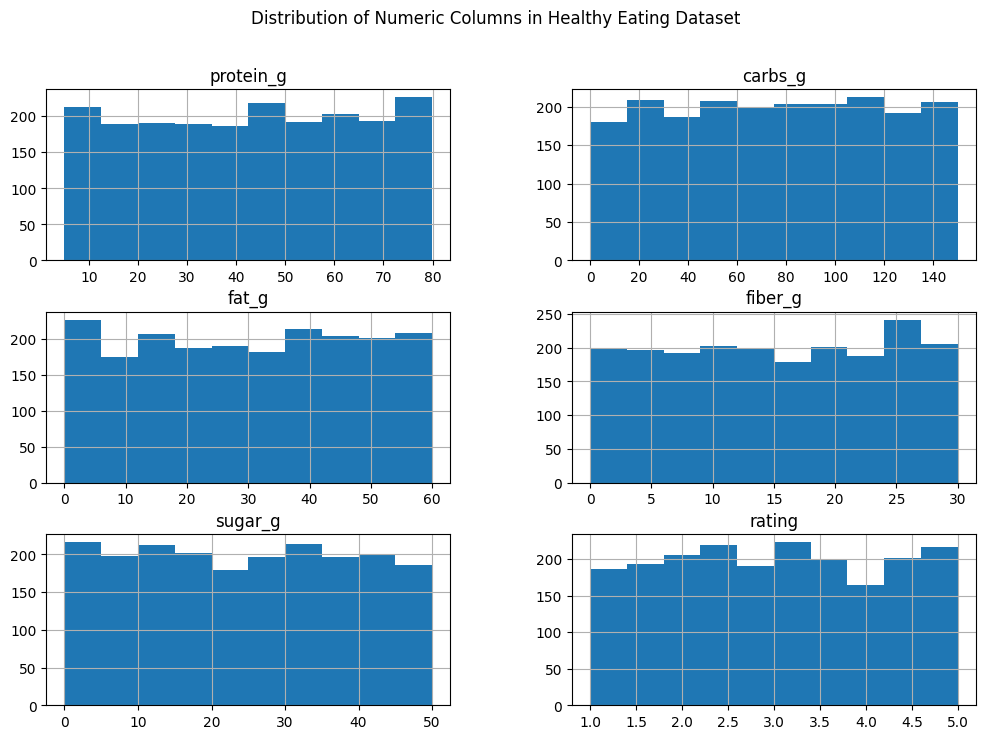

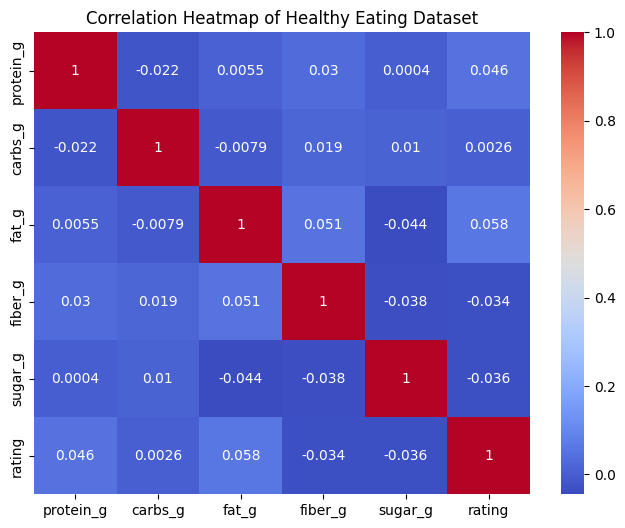

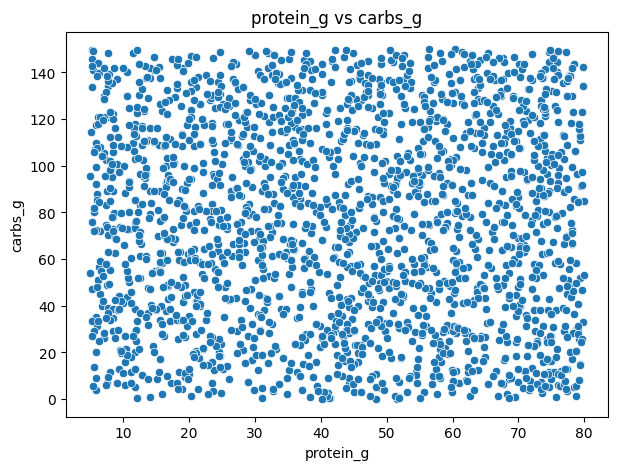

In [6]:
# --- Visualize Numeric Distributions ---
if not pdf.select_dtypes(include=['int64','float64']).empty:
    numeric_data = pdf.select_dtypes(include=['int64','float64'])
    numeric_data.hist(figsize=(12,8))
    plt.suptitle("Distribution of Numeric Columns in Healthy Eating Dataset")
    plt.show()

    # --- Correlation Heatmap ---
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap of Healthy Eating Dataset")
    plt.show()

    # --- Example: Scatter Plot of First Two Numeric Columns ---
    if len(numeric_data.columns) >= 2:
        plt.figure(figsize=(7,5))
        sns.scatterplot(x=numeric_data.columns[0], y=numeric_data.columns[1], data=numeric_data)
        plt.title(f"{numeric_data.columns[0]} vs {numeric_data.columns[1]}")
        plt.show()
else:
    print("\nNo numeric columns available for visualization.")

In [7]:
# --- Data Cleaning (Optional) ---
# Fill missing numeric values with column mean
cleaned_df = df.fillna({c: df.select(mean(col(c))).first()[0] for c in numeric_cols})
print("\n=== Missing numeric values filled with column mean ===")

# --- Display cleaned data sample ---
cleaned_df.show(5)

# --- Stop Spark Session ---
spark.stop()



=== Missing numeric values filled with column mean ===
+-------+-------------+-------+---------+---------+--------+---------+-------+-----+-------+-------+---------+--------------+--------------+--------------+-------------+-------------+------+----------+--------------------+
|meal_id|    meal_name|cuisine|meal_type|diet_type|calories|protein_g|carbs_g|fat_g|fiber_g|sugar_g|sodium_mg|cholesterol_mg|serving_size_g|cooking_method|prep_time_min|cook_time_min|rating|is_healthy|           image_url|
+-------+-------------+-------+---------+---------+--------+---------+-------+-----+-------+-------+---------+--------------+--------------+--------------+-------------+-------------+------+----------+--------------------+
|      1|    Kid Pasta| Indian|    Lunch|     Keto|     737|     52.4|   43.9| 34.3|   16.8|   42.9|     2079|            91|           206|       Grilled|           47|           56|   4.4|         0|https://example.c...|
|      2| Husband Rice|Mexican|    Lunch|    Paleo| 

In [8]:
# -------- 1. IMPORT LIBRARIES --------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------- 2. LOAD DATA --------
file_path = "healthy_eating_dataset.csv"  
df = pd.read_csv(file_path)

# -------- 3. BASIC INFO --------
print("Dataset Shape:", df.shape)
print("\nDataset Preview:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (2000, 20)

Dataset Preview:
    meal_id      meal_name  cuisine meal_type diet_type  calories  protein_g  \
0        1      Kid Pasta   Indian     Lunch      Keto       737       52.4   
1        2   Husband Rice  Mexican     Lunch     Paleo       182       74.7   
2        3  Activity Rice   Indian     Snack     Paleo       881       52.9   
3        4  Another Salad  Mexican     Snack      Keto       427       17.5   
4        5     Quite Stew     Thai     Lunch     Vegan       210       51.6   

   carbs_g  fat_g  fiber_g  sugar_g  sodium_mg  cholesterol_mg  \
0     43.9   34.3     16.8     42.9       2079              91   
1    144.4    0.1     22.3     38.6        423               7   
2     97.3   18.8     20.0     37.5       2383             209   
3     73.1    7.6      9.8     41.7        846             107   
4    104.3   26.3     24.8     18.2       1460              42   

   serving_size_g cooking_method  prep_time_min  cook_time_min  rating  \
0        

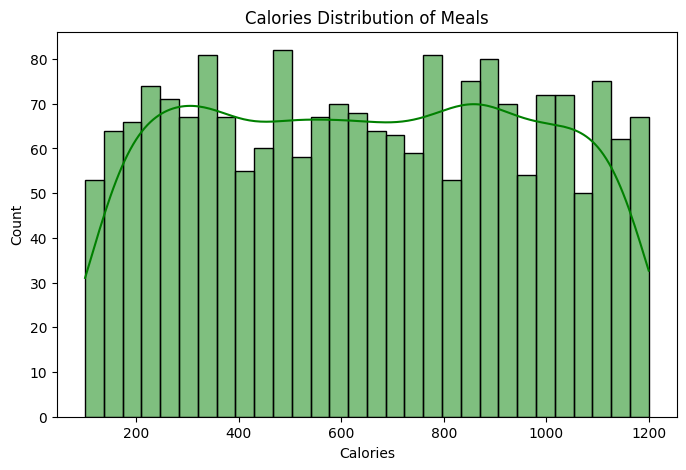

In [9]:
# -------- 4. VISUALIZATIONS --------

# ---- Calories Distribution ----
plt.figure(figsize=(8,5))
sns.histplot(df['calories'], bins=30, kde=True, color='green')
plt.title("Calories Distribution of Meals")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()


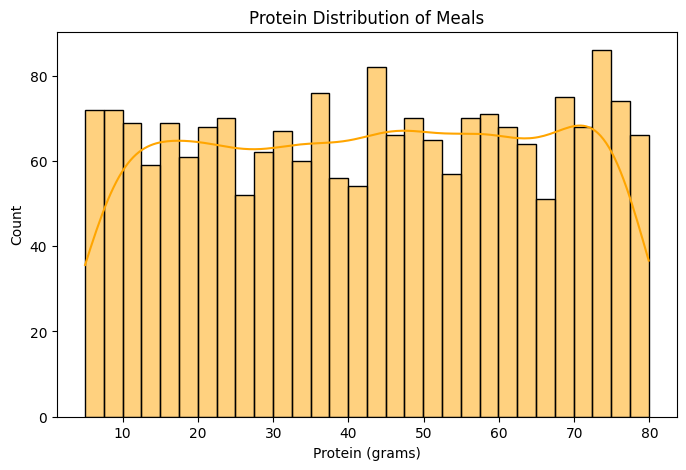

In [10]:
#---Protein Distribution--------
plt.figure(figsize=(8,5))
sns.histplot(df['protein_g'], bins=30, kde=True, color='orange')
plt.title("Protein Distribution of Meals")
plt.xlabel("Protein (grams)")
plt.ylabel("Count")
plt.show()


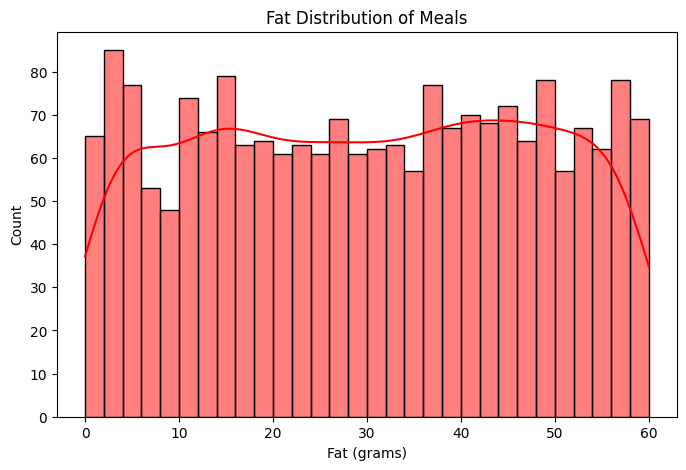

In [11]:
#----Fat Distribution------
plt.figure(figsize=(8,5))
sns.histplot(df['fat_g'], bins=30, kde=True, color='red')
plt.title("Fat Distribution of Meals")
plt.xlabel("Fat (grams)")
plt.ylabel("Count")
plt.show()


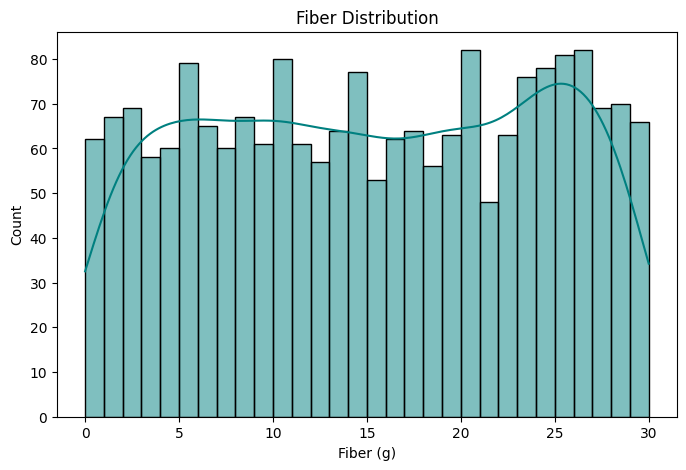

In [12]:
#----Fiber Distribution------
plt.figure(figsize=(8,5))
sns.histplot(df['fiber_g'], bins=30, kde=True, color='teal')
plt.title("Fiber Distribution")
plt.xlabel("Fiber (g)")
plt.ylabel("Count")
plt.show()

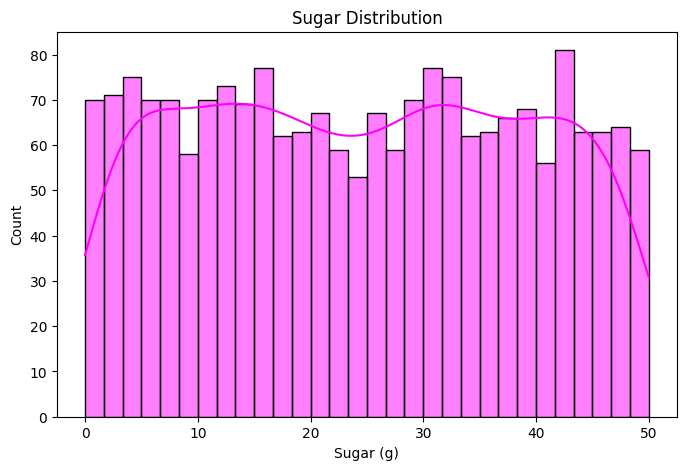

In [13]:
#-----sugar Distribution-----
plt.figure(figsize=(8,5))
sns.histplot(df['sugar_g'], bins=30, kde=True, color='magenta')
plt.title("Sugar Distribution")
plt.xlabel("Sugar (g)")
plt.ylabel("Count")
plt.show()

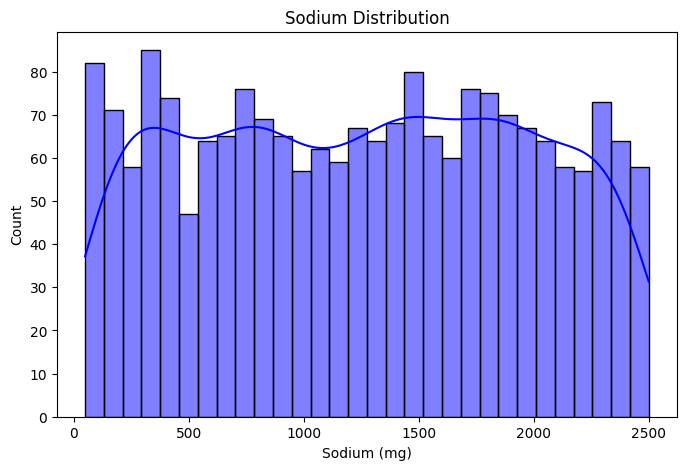

In [14]:
#-----Sodium Distribution------
plt.figure(figsize=(8,5))
sns.histplot(df['sodium_mg'], bins=30, kde=True, color='blue')
plt.title("Sodium Distribution")
plt.xlabel("Sodium (mg)")
plt.ylabel("Count")
plt.show()

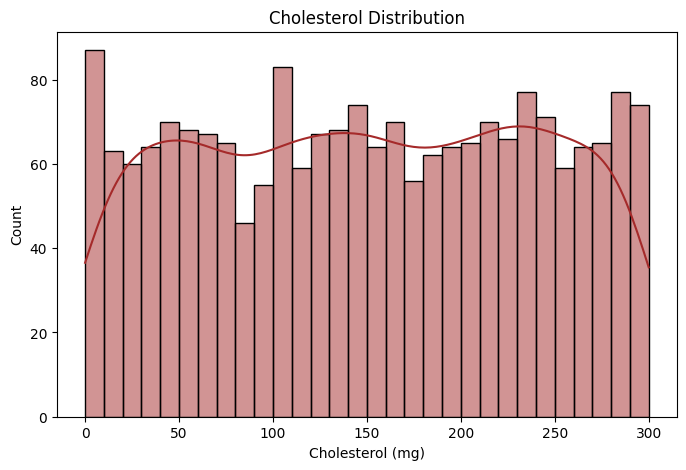

In [15]:
#------Cholesterol Distribution------
plt.figure(figsize=(8,5))
sns.histplot(df['cholesterol_mg'], bins=30, kde=True, color='brown')
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol (mg)")
plt.ylabel("Count")
plt.show()

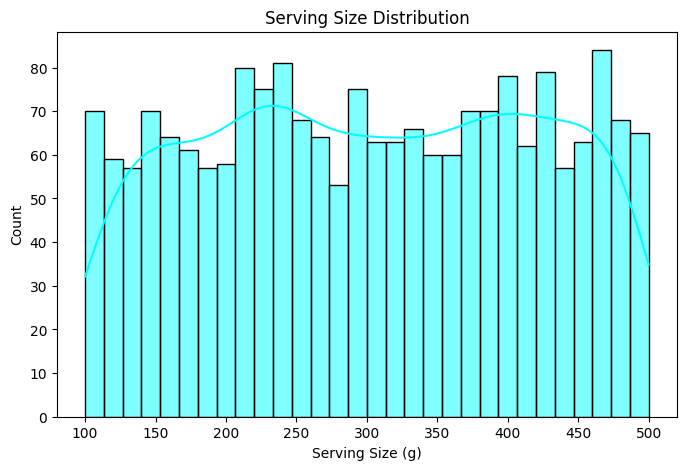

In [16]:
#------Serving Size Distribution------
plt.figure(figsize=(8,5))
sns.histplot(df['serving_size_g'], bins=30, kde=True, color='cyan')
plt.title("Serving Size Distribution")
plt.xlabel("Serving Size (g)")
plt.ylabel("Count")
plt.show()

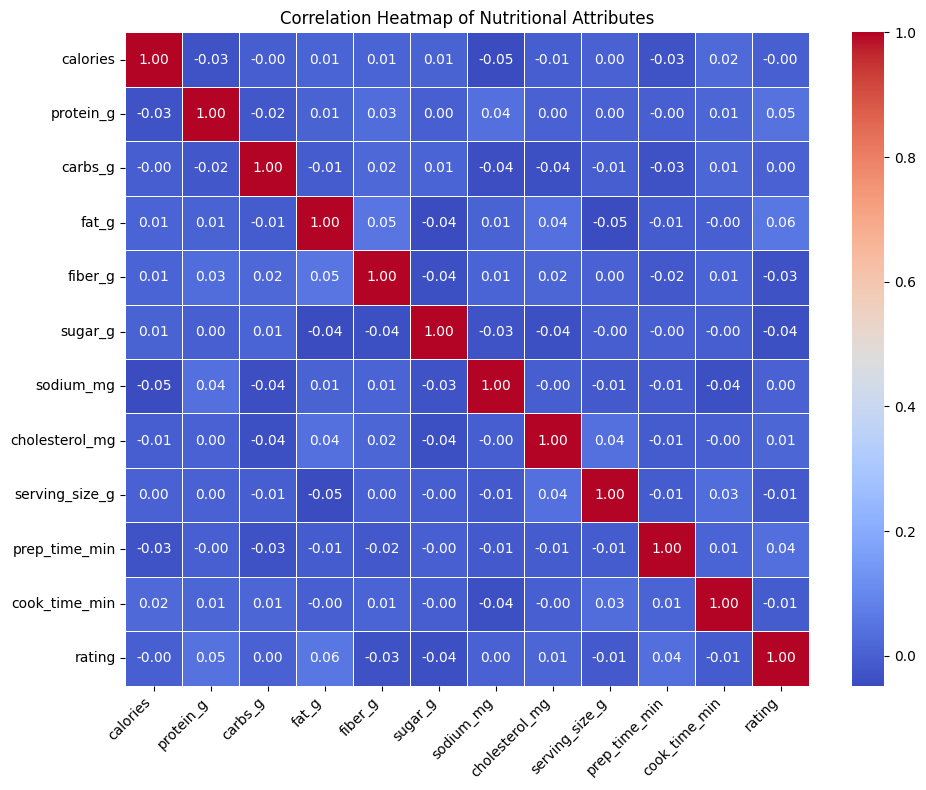

In [17]:
# ---- Correlation HeatMap of Nutritional Attributes ----
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = [
    'calories', 'protein_g', 'carbs_g', 'fat_g', 'fiber_g', 
    'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 
    'prep_time_min', 'cook_time_min', 'rating'
]

numeric_cols = [c for c in numeric_cols if c in df.columns]
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Nutritional Attributes")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


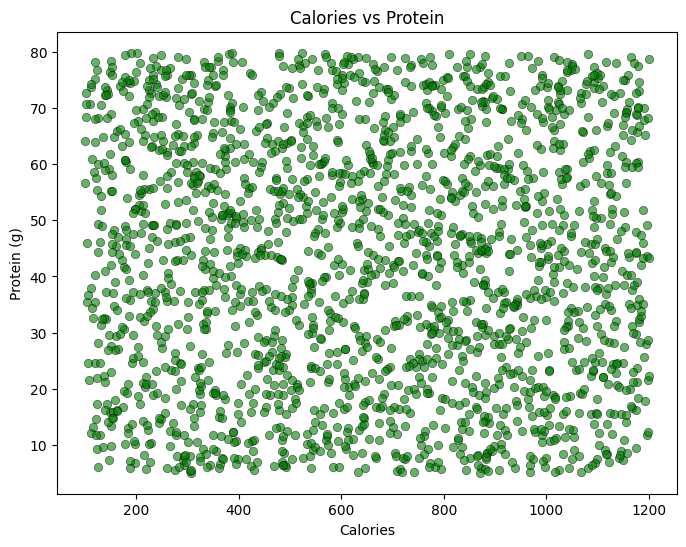

In [18]:
#----Calories vs Protein-------
plt.figure(figsize=(8,6))
sns.scatterplot(x='calories', y='protein_g', data=df, color='green', alpha=0.6, edgecolor='k')
plt.title("Calories vs Protein")
plt.xlabel("Calories")
plt.ylabel("Protein (g)")
plt.show()

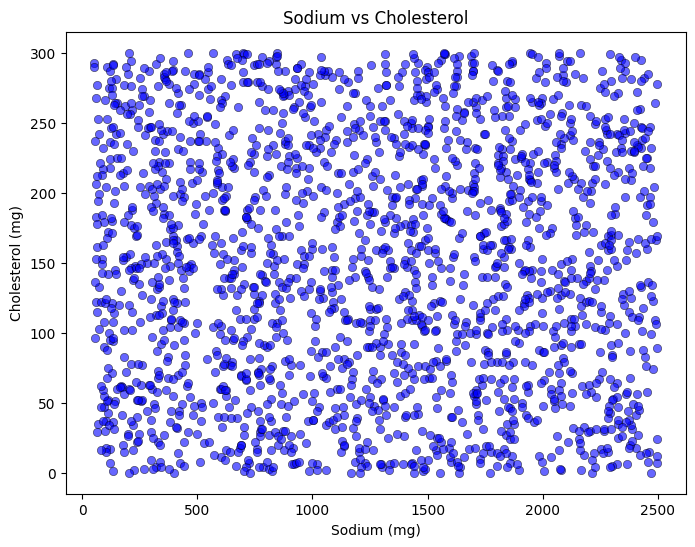

In [19]:
#-----Sodium vs Cholesterol (Scatter Plot)------
plt.figure(figsize=(8,6))
sns.scatterplot(x='sodium_mg', y='cholesterol_mg', data=df, color='blue', alpha=0.6, edgecolor='k')
plt.title("Sodium vs Cholesterol")
plt.xlabel("Sodium (mg)")
plt.ylabel("Cholesterol (mg)")
plt.show()

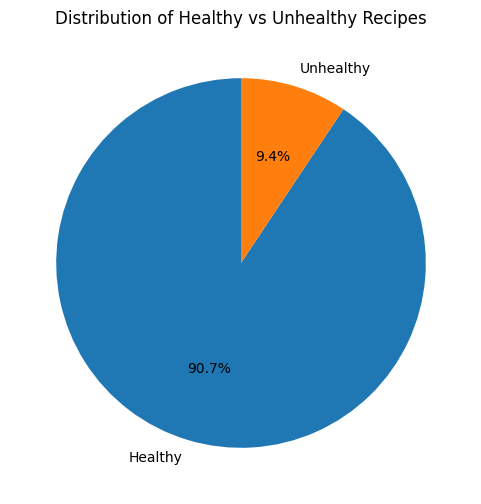

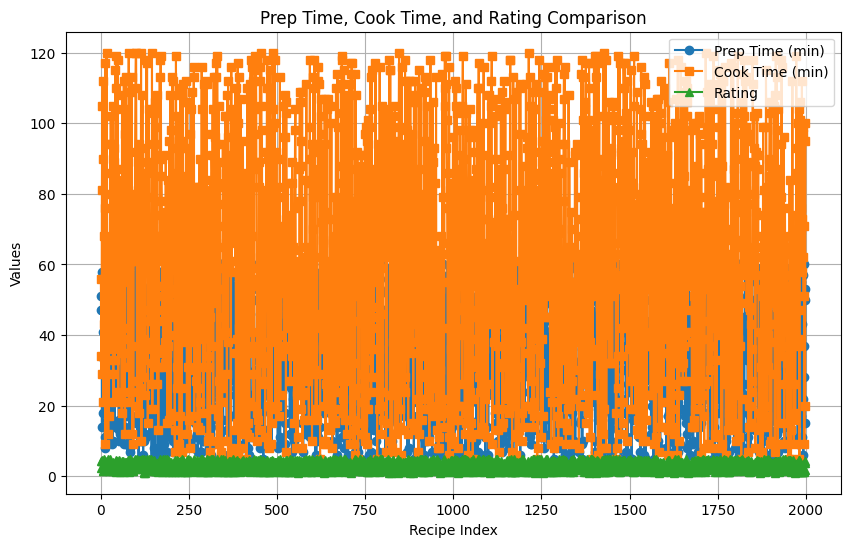

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("healthy_eating_dataset.csv")

# --- Pie Chart: Healthy vs Unhealthy ---
healthy_counts = df['is_healthy'].value_counts()
labels = ['Healthy', 'Unhealthy']

plt.figure(figsize=(6,6))
plt.pie(healthy_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Healthy vs Unhealthy Recipes")
plt.show()

# --- Line Graph: Prep time, Cook time, and Rating ---
plt.figure(figsize=(10,6))
plt.plot(df.index, df['prep_time_min'], label='Prep Time (min)', marker='o')
plt.plot(df.index, df['cook_time_min'], label='Cook Time (min)', marker='s')
plt.plot(df.index, df['rating'], label='Rating', marker='^')

plt.title("Prep Time, Cook Time, and Rating Comparison")
plt.xlabel("Recipe Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import pandas as pd
df = pd.read_csv("healthy_eating_dataset.csv")
highest = df.loc[df['rating'].idxmax()]
print("Recipe with Highest Rating:")
print(highest)


Recipe with Highest Rating:
meal_id                                               10
meal_name                                      Ask Pasta
cuisine                                          Mexican
meal_type                                         Dinner
diet_type                                       Balanced
calories                                             671
protein_g                                           48.4
carbs_g                                             76.4
fat_g                                               38.2
fiber_g                                             14.7
sugar_g                                             29.4
sodium_mg                                           1110
cholesterol_mg                                       214
serving_size_g                                       117
cooking_method                                   Roasted
prep_time_min                                         35
cook_time_min                                         68
rat

In [22]:
import pandas as pd
df = pd.read_csv("healthy_eating_dataset.csv")
df['total_time'] = df['prep_time_min'] + df['cook_time_min']
max_time_row = df.loc[df['total_time'].idxmax()]

print("Recipe that takes the longest time:")
print(max_time_row)


Recipe that takes the longest time:
meal_id                                               1469
meal_name                                     Address Rice
cuisine                                            Italian
meal_type                                        Breakfast
diet_type                                         Balanced
calories                                               469
protein_g                                             55.2
carbs_g                                               60.4
fat_g                                                 18.4
fiber_g                                                2.3
sugar_g                                                8.1
sodium_mg                                              342
cholesterol_mg                                          92
serving_size_g                                         268
cooking_method                                         Raw
prep_time_min                                           60
cook_time_min       

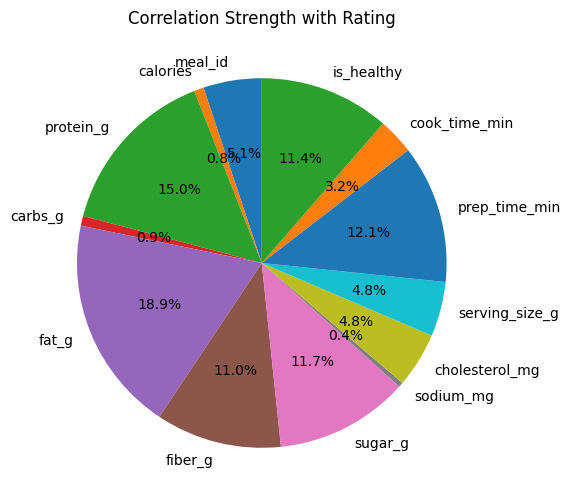

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("healthy_eating_dataset.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# --- Compute correlation matrix ---
corr = numeric_df.corr()

# --- PIE CHART: Correlation of each column with 'rating' ---
if 'rating' in numeric_df.columns:
    rating_corr = corr['rating'].drop('rating')  # exclude self-correlation
    plt.figure(figsize=(6,6))
    plt.pie(
        rating_corr.abs(), 
        labels=rating_corr.index,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title("Correlation Strength with Rating")
    plt.show()
else:
    print("Column 'rating' not found for correlation pie chart.")




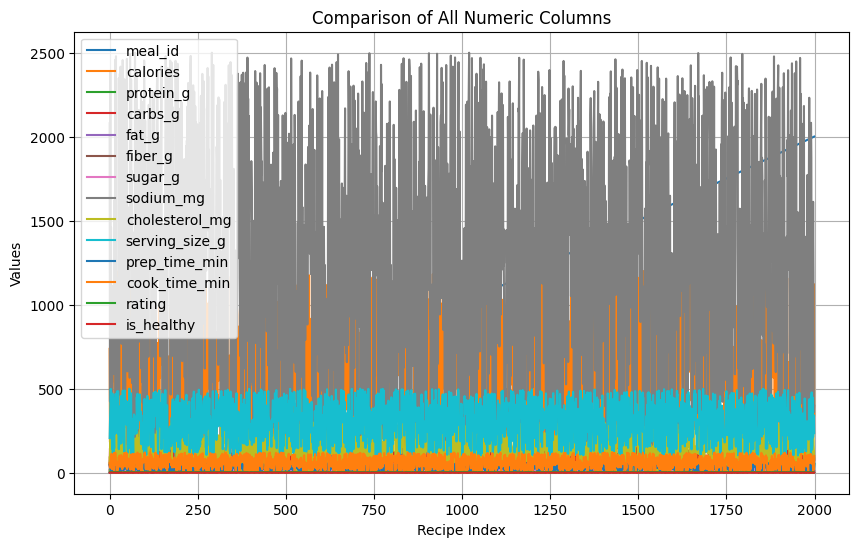

In [24]:
# --- LINE GRAPH: Compare numeric columns ---
plt.figure(figsize=(10,6))
for col in numeric_df.columns:
    plt.plot(df.index, numeric_df[col], label=col)

plt.title("Comparison of All Numeric Columns")
plt.xlabel("Recipe Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()